In [52]:
import numpy as np
import pandas as pd
import re

In [53]:
f=open('./data/WhatsApp Chat with G 8 unofficial.txt','r',encoding='utf-8')

In [54]:
data=f.read()

In [55]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [56]:
messages=re.split(pattern,data)[1:]

In [57]:
dates=re.findall(pattern,data)

In [75]:
df=pd.DataFrame({'user_messages': messages,'message_date': dates})
df.head()

,user_messages,message_date
0,Messages and calls are end-to-end encrypted. N...,"2/2/22, 15:37 -"
1,"+91 94723 00471 created group ""G-8 Unofficial""\n","2/2/22, 15:33 -"
2,You joined using this group's invite link\n,"2/2/22, 15:37 -"
3,+91 95186 29772 joined using this group's invi...,"2/2/22, 15:42 -"
4,Aditya Sharma joined using this group's invite...,"2/2/22, 15:42 -"


In [76]:
def datetime_conv(x):
    x=x.split(",")
    date=x[0]
    time=x[1].strip()
    time=time.split(' ')[0]
    return date,time
        

In [77]:
date=[]
time=[]
arr=df['message_date'].apply(lambda x:datetime_conv(x))
for i in arr:
    date.append(i[0])
    time.append(i[1])

In [78]:
df['date']=date
df['time']=time

In [79]:
df.drop('message_date',axis=1,inplace=True)

In [80]:
# for x in df['message_date']:
#     x=x.split(",")
#     date=x[0]
#     time=x[1].strip()
#     time=time.split(' ')[0]
#     print(y)

In [81]:
# df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')

In [82]:
df

,user_messages,date,time
0,Messages and calls are end-to-end encrypted. N...,2/2/22,15:37
1,"+91 94723 00471 created group ""G-8 Unofficial""\n",2/2/22,15:33
2,You joined using this group's invite link\n,2/2/22,15:37
3,+91 95186 29772 joined using this group's invi...,2/2/22,15:42
4,Aditya Sharma joined using this group's invite...,2/2/22,15:42
...,...,...,...
6670,<Media omitted>\n,8/4/22,10:47
6671,Kisi k mcp lab m A+ ya O aaya?\n,8/4/22,12:59
6672,@919646370683\n,8/4/22,13:01
6673,<Media omitted>\n,8/4/22,13:01


In [83]:
users=[]
messages=[]

for x in df['user_messages']:
    entry=re.split('([\w\W]+?):\s',x)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [84]:
df['user']=users
df['message']=messages
df.drop('user_messages',axis=1,inplace=True)

In [89]:
day=[]
month=[]
year=[]
for x in df["date"]:
    x=x.split('/')
    day.append(x[1])
    month.append(x[0])
    year.append(x[2])

In [90]:
df['day']=day
df['month']=month
df['year']=year

In [91]:
df['month'].value_counts()

2    2276
3    1563
4    1290
7     623
5     489
6     403
8      31
Name: month, dtype: int64

In [92]:
months={'1':'January',
        "2":'February',
        "3":'March',
        "4":"April",
        "5":"May",
        "6":"June",
        "7":"July",
        "8":'August',
        "9":"September",
        "10":'October',
        "11":"November",
        "12":"December"}

In [93]:
df.replace({"month":months},inplace=True)

In [94]:
hour=[]
minute=[]
for x in df["time"]:
    x=x.split(":")
    hour.append(x[0])
    minute.append(x[1])

In [95]:
df["hour"]=hour
df['minute']=minute
df.drop({'time'},axis=1,inplace=True)

In [96]:
df

,date,user,message,day,month,year,hour,minute
0,2/2/22,group_notification,Messages and calls are end-to-end encrypted. N...,2,February,22,15,37
1,2/2/22,group_notification,"+91 94723 00471 created group ""G-8 Unofficial""\n",2,February,22,15,33
2,2/2/22,group_notification,You joined using this group's invite link\n,2,February,22,15,37
3,2/2/22,group_notification,+91 95186 29772 joined using this group's invi...,2,February,22,15,42
4,2/2/22,group_notification,Aditya Sharma joined using this group's invite...,2,February,22,15,42
...,...,...,...,...,...,...,...,...
6670,8/4/22,group_notification,<Media omitted>\n,4,August,22,10,47
6671,8/4/22,group_notification,Kisi k mcp lab m A+ ya O aaya?\n,4,August,22,12,59
6672,8/4/22,group_notification,@919646370683\n,4,August,22,13,01
6673,8/4/22,group_notification,<Media omitted>\n,4,August,22,13,01


In [97]:
df['user'].unique()

array(['group_notification'], dtype=object)

In [98]:
df[df['user']=='Chidi🐦']['message']

Series([], Name: message, dtype: object)

words=[]
for message in messages:
    words.extend(message.split())

In [99]:
words=[]
for message in df['message']:
    words.extend(message.split())
len(words)

31395

In [100]:
# ! pip install urlextract

In [101]:
# from urlextract import URLExtract

# links= []
# for message in df['message']:
#     extractor=URLExtract()
#     urls=extractor.find_urls(message)
#     links.extend(urls)

In [102]:
# len(links)


In [103]:
x=df['user'].value_counts().head(10)

In [104]:
name=x.index
count=x.values

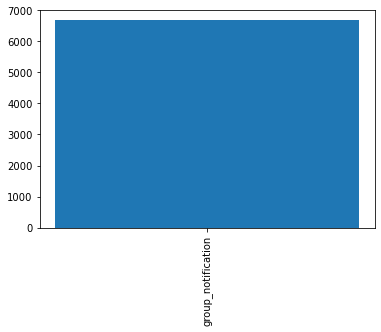

In [105]:
import matplotlib.pyplot as plt
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})

,name,percent
0,group_notification,100.0


In [107]:
# !pip install wordcloud

In [108]:
f=open('stop_hinglish.txt',"r")
stop_words=f.read()
# print(stop_words)

In [109]:
words=[]
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']
for message in temp["message"]:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [110]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

""


In [139]:
# !pip install emoji

In [141]:
import emoji
emojis =[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.distinct_emoji_list(message) ])

In [142]:
pd.DataFrame(Counter(emojis).most_common(50))

,0,1
0,😂,1479
1,🤣,143
2,🥲,106
3,👍,53
4,🥳,34
5,🎉,34
6,😅,30
7,🙂,27
8,🛐,23
9,🥺,21


In [113]:
date_num=[]
# count=0
for x in df['date']:
    x=x.split('/')
    # print(x[1])
    # count+=1
    date_num.append(x[1])
# print(count)

In [114]:
df['month_num']=date_num

In [115]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [116]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-'+str(timeline['year'][i]))

In [120]:
timeline['time']=time

In [123]:
timeline

,year,month_num,month,message,time
0,22,1,April,21,April-22
1,22,1,August,7,August-22
2,22,1,June,64,June-22
3,22,1,May,5,May-22
4,22,10,April,9,April-22
...,...,...,...,...,...
134,22,9,February,59,February-22
135,22,9,July,2,July-22
136,22,9,June,37,June-22
137,22,9,March,99,March-22


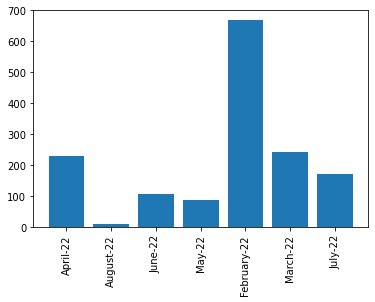

In [153]:
plt.bar(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [147]:
daily_timeline=df.groupby('day').count()['message'].reset_index()

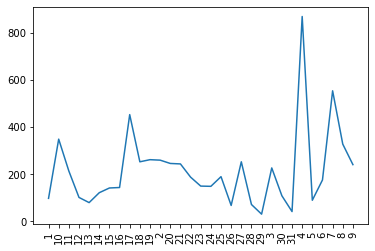

In [151]:
plt.plot(daily_timeline['day'],daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()